In [376]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from skimpy import skim 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}


In [119]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}

url="https://www.ebay.com/sch/i.html?_from=R40&_trksid=p4439441.m570.l1313&_nkw=sneakers&_sacat=0"
page=requests.get(url,"html",headers=headers)
page

<Response [200]>

In [120]:
soup = BeautifulSoup(page.content, 'html.parser')

In [122]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]><html class="ie9" lang="en"><![endif]-->
<!--[if gt IE 9]><!-->
<html lang="en">
 <!--<![endif]-->
 <!--M#s0-2-->
 <noscript class="x-page-config">
 </noscript>
 <!--M/-->
 <head>
  <!--M#s0-5-->
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script>
   (function () {
        'use strict';
        if (window.PerformanceObserver && performance && performance.mark && performance.getEntriesByName) {
            window.SRP = window.SRP || {};
            var paintObserver = new window.PerformanceObserver(function (list) {
                var paintEntries = list.getEntries();
                paintEntries.sort(function (a, b) {
                    return a.startTime - b.startTime;
                });
                // begin looking for TTI at first contentful paint
                if (!paintEntries || paintEntries.length < 2) {
                    // to avoid undefined issue on Safari
                    return;
                }
                va

In [123]:
all=soup.find_all("ul",attrs={"class":"srp-results srp-grid clearfix"})
all

[<ul class="srp-results srp-grid clearfix"><li class="srp-results__clear"></li><li class="srp-river-answer srp-river-answer--NAVIGATION_ANSWER_COLLAPSIBLE_CAROUSEL" data-gr2="1" data-gr3="1" data-gr4="1" data-view="mi:43632|iid:1|scen:MULTI_ASPECT_GUIDANCE_PROVIDER"><div class="srp-multi-aspect-guidance srp-controls-v3"><!--M#s0-60-0-13-8-4-3-0-3-0-7[0]-0-2-0-2--><!--M^s0-60-0-13-8-4-3-0-3-0-7[0]-0-2-0-2-0 s0-60-0-13-8-4-3-0-3-0-7[0]-0-2-0-2 0--><div __isempty="" class="ebay-carousel-wrapper"><!--M^s0-60-0-13-8-4-3-0-3-0-7[0]-0-2-0-2-0-0-2 s0-60-0-13-8-4-3-0-3-0-7[0]-0-2-0-2 2--><div aria-label="Multi-Aspect Guidance Carousel" aria-roledescription="Carousel" class="carousel srp-carousel-list srp-carousel-list--text" no-dots="" role="group"><div class="carousel__container" id="s0-60-0-13-8-4-3-0-3-0-7[0]-0-2-0-2-0-0-2-container"><button aria-disabled="true" aria-label="Go to previous slide - Multi-Aspect Guidance Carousel" class="carousel__control carousel__control--prev" type="button">

In [131]:
a_tags1=soup.find_all("a",attrs={"class":"s-item__link"})

In [133]:
a_tags1

[<a _sp="" class="s-item__link" data-interactions='[{"actionKind":"NAVSRC","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}]' data-s-jmye788='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"","flushImmediately":false,"eventProperty":{"trackableId":"01GDF2P4GS7EBZ8M2AWN707B","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}}' href="https://ebay.com/itm/123456?itmmeta=012DEW30YG0MEEKND7NH&amp;hash=item123546:g:acwAA9KNiJowH:sc:ShippingMethodStandard!95008!US!-1&amp;itmprp=enc%3AbgepL1tlUHjMGCVfSTGJh%2BzsVKeJ3CQk7NizDI4BZeppuFnmyS6Ijyp8lh%2FnEw%2BWqO7uTV1Q6izE1R0T54aV8j71F4xlWfVcGft4%2FiOQhtqVXA1rW6M1atPARQRmhqUxtEPJKhKtSFgI%2Bvwlzb0GwVCtkp%3ABlBMUObkmabpYw" tabindex="-1" target="_blank"><div class="s-item__title"><span aria-level="3" role="heading"><!--F#f_0-->Shop on eBay<!--F/--></span></div><span class="clipped">Opens in a new window or tab</span></a>,
 <a _sp="" class="s

# Product Link Scraping

In [135]:
all_products = soup.find_all("ul", attrs={"class": "srp-results srp-grid clearfix"})
product_link=[]
for link in all_products:
    a_tags = link.find_all("a", attrs={"class": "s-item__link"})
    for a in a_tags:
        product_link.append(a['href'])


In [137]:
product_link

['https://www.ebay.com/itm/267018436889?_skw=sneakers&itmmeta=01JC07XP4BYD3N6X5GFEPRNQDP&hash=item3e2b8a0119%3Ag%3A23kAAOSwG3dnAvNe&itmprp=enc%3AAQAJAAAAwHoV3kP08IDx%2BKZ9MfhVJKnSFNTdMQGPkydDX9wI1Nhj1ESKQYL9P%2BNL5AE4ckiRaTrnle%2BzpJGQaK8eN9nOLew72vIU2Kw22dKS%2B1XZKQVC6k6WyKgLNFpzC0XPopS4DyNUpTGftKxbOgkBCTOjCFQ1US8tEuoCCxRTihjW%2Bp2%2BlVFpy1FzDih7ThVQmhrc3fZG2j3c97zM%2BEqdxzfF226ZP%2FYNogTovgqbZoGPWBtnYQjVQ8Ve1hTRYExiF%2FPmEA%3D%3D%7Ctkp%3ABlBMUKDi9ofgZA&var=566757073760',
 'https://www.ebay.com/itm/156114695071?_skw=sneakers&epid=10072266657&itmmeta=01JC07XP4B2F2B1Y88210Y1RKP&hash=item245929339f%3Ag%3AB-sAAOSwHxll914Z&itmprp=enc%3AAQAJAAAAwHoV3kP08IDx%2BKZ9MfhVJKnURXOgP7Kgtw7jYz0O4RJkbfHjpq9WDe63xTPUbo51ABMAvwkCG5ZVhj6FKiWFa5VGMLCkVaTsjZ8WdECKkSKyp8NlB30L%2Fk7yGytCk--necyA%2B0HpH61b5MA1qPOSHv5sj2H1%2FsRVdlTsKAdwJWCSih10Egeyy2V57tNgffpgnLHmXm6zSFXHQJEatNBDBfKc5i8QILLbxvh5KTUInyICSeEwOA1fM%2FnyyOfGADfvow%3D%3D%7Ctkp%3ABlBMUKDi9ofgZA&var=456882676073',
 'https://www.ebay.com/itm/29645084

In [161]:
product_link[1]

'https://www.ebay.com/itm/156114695071?_skw=sneakers&epid=10072266657&itmmeta=01JC07XP4B2F2B1Y88210Y1RKP&hash=item245929339f%3Ag%3AB-sAAOSwHxll914Z&itmprp=enc%3AAQAJAAAAwHoV3kP08IDx%2BKZ9MfhVJKnURXOgP7Kgtw7jYz0O4RJkbfHjpq9WDe63xTPUbo51ABMAvwkCG5ZVhj6FKiWFa5VGMLCkVaTsjZ8WdECKkSKyp8NlB30L%2Fk7yGytCk--necyA%2B0HpH61b5MA1qPOSHv5sj2H1%2FsRVdlTsKAdwJWCSih10Egeyy2V57tNgffpgnLHmXm6zSFXHQJEatNBDBfKc5i8QILLbxvh5KTUInyICSeEwOA1fM%2FnyyOfGADfvow%3D%3D%7Ctkp%3ABlBMUKDi9ofgZA&var=456882676073'

# Product Page scrping

In [141]:
product_page1=requests.get(product_link[1], headers=headers)


In [143]:
single_p_soup1=BeautifulSoup(product_page1.content,"html.parser")


In [145]:
single_p_soup1

<!DOCTYPE html>
<html lang="en"><head><link href="//thumbs.ebaystatic.com" rel="dns-prefetch"/><link href="//vi.vipr.ebaydesc.com" rel="dns-prefetch"/><link href="//p.ebaystatic.com" rel="dns-prefetch"/><link href="//thumbs.ebaystatic.com" rel="dns-prefetch"/><link href="//q.ebaystatic.com" rel="dns-prefetch"/><link href="//pics.ebaystatic.com" rel="dns-prefetch"/><link href="//srx.main.ebayrtm.com" rel="dns-prefetch"/><link href="//reco.ebay.com" rel="dns-prefetch"/><link href="//ir.ebaystatic.com" rel="dns-prefetch"/><link href="//secureir.ebaystatic.com" rel="dns-prefetch"/><link href="//i.ebayimg.com" rel="dns-prefetch"/><link href="//rover.ebay.com" rel="dns-prefetch"/><script>$ssgST=new Date().getTime();</script><style>
    .font-marketsans body {
        font-family: "Market Sans", Arial, sans-serif;
    }
</style><script>
    (function() {
        var useCustomFont = ('fontDisplay' in document.documentElement.style) ||
                        (localStorage && localStorage.getIt

In [147]:
# prodct Title
single_p_soup1.find("span",attrs={"class":"ux-textspans ux-textspans--BOLD"}).text.strip()


'Puma Pl Ca Pro Mid High Top Mens Black Sneakers Casual Shoes 307954 01'

In [149]:
# product Price
single_p_soup1.find("div",attrs={"class":"x-price-primary"}).text


'US $59.99'

In [151]:
# product available
single_p_soup1.find("div",attrs={"id":"qtyAvailability"}).text


'Last one6 sold'

In [153]:
# product sold
single_p_soup1.find("div",attrs={"id":"qtyAvailability"}).text


'Last one6 sold'

In [155]:
# prodcut like
single_p_soup1.find("span",attrs={"class":"x-watch-heart-btn-text"}).text.strip()


'15'

In [159]:
# product review
single_p_soup1.find("span",attrs={"class":"SECONDARY"}).text.strip("()")


'2,865'

In [ ]:
product_title=p_soup.find("span",attrs={"id":"productTitle"}).text.strip()
product_price=p_soup.find("span",attrs={"id":"productTitle"}).text
product_available=p_soup.find("span",attrs={"id":"productTitle"}).text.strip()
product_sold=p_soup.find("span",attrs={"id":"productTitle"}).text.strip()
product_brand=p_soup.find("span",attrs={"id":"productTitle"}).text.strip()
product_like=p_soup.find("span",attrs={"id":"productTitle"}).text.strip()
product_review=p_soup.find("span",attrs={"id":"productTitle"}).text.strip()

In [291]:
# creating function to extract product title from product page

def get_title(single_p_soup):
    try:
        product_title=single_p_soup.find("span",attrs={"class":"ux-textspans ux-textspans--BOLD"}).text.strip()
    except:
        product_title= ""

    return product_title
    

In [293]:
# creating function to extract price from product page

def get_price(single_p_soup):
    try:
        product_price=single_p_soup.find("div",attrs={"class":"x-price-primary"}).text
    except:
        product_price= ""

    return product_price
    

In [232]:
# creating function to extract review from product page

def get_review(single_p_soup):
    try:
        product_review=single_p_soup.find("span",attrs={"class":"SECONDARY"}).text.strip("()")
    except:
        product_review= ""

    return product_review
    

In [433]:
# creating function to extract review from product page

def get_likes(single_p_soup):
    try:
        product_likes=single_p_soup.find("span",attrs={"class":"x-watch-heart-btn-text"}).text.strip()
    except:
        product_likes= ""

    return product_likes
    

In [435]:
# creating dictionary to store title and other details
d={"Title":[],"Price":[], "Review":[],"likes":[]}

for i in product_link:
    product_page = requests.get(i, headers=headers)
    single_p_soup=BeautifulSoup(product_page.content,"html.parser")

    d["Title"].append(get_title(single_p_soup))
    d["Price"].append(get_price(single_p_soup))
    d["likes"].append(get_likes(single_p_soup))


In [454]:
# d["Price"]
# price_review=[]
# for i in range(0,len(d["Price"]),2):
#     price_review.append(d["Price"][i:i+2])
#     print(d["Price"][i:i+2])    

In [462]:
len(d["likes"])

60

In [464]:
# creating dictionary to store title and other details
d={"Title":[],"Price":[], "Review":[],"likes":[]}

for i in product_link:
    product_page = requests.get(i, headers=headers)
    single_p_soup=BeautifulSoup(product_page.content,"html.parser")

    d["Title"].append(get_title(single_p_soup))
    d["Price"].append(get_price(single_p_soup))
    d["Review"].append(get_review(single_p_soup))
    d["likes"].append(get_likes(single_p_soup))


In [466]:
d["Title"]

["Women's Shoes UGG LOWMEL Suede & Canvas High Top Sneakers 1144032 CHESTNUT",
 "Women's Shoes UGG LOWMEL Suede & Canvas High Top Sneakers 1144032 HICKORY",
 "PUMA Men's Turino II Sneakers",
 'Nike Dunk Low University Blue UNC North Carolina Light Blue Men’s Size 14',
 'Reebok Classic Nylon Men’s Running Shoe Black Athletic Sneakers #231 #9273',
 'New Balance 327 NB U327 Unisex Casual Lifestyle Fashion Shoes Sneakers Pick 1',
 "Nike Air Jordan 12 Retro Bordeaux Men's Berry Sneakers - Size 8.5",
 "Adidas Originals Superstar Men's Athletic Shoe White Sneakers Trainers #368",
 'Reebok Classic Glide Men’s Running Shoe Black Athletic Sneakers #322 #0028',
 'HOKA Women’s Bondi 7 All Black Running Sneakers Choose Your Size',
 'Size 10.5 - Air Jordan 6 Retro All Star - Chameleon CLEAN 🧼 NO BOX NO RESERVE',
 'adidas Originals Handball Spezial Gum Women Men Unisex Casual Shoes Pick 1',
 "Women's Shoes UGG LOWMEL Suede & Canvas High Top Sneakers 1144032 SAND",
 'Aphrodite Journal | Blank Pages',


In [472]:
d["Price"]

['US $119.95',
 'US $119.95',
 'US $24.99',
 'US $0.99',
 'US $59.95',
 'US $89.99',
 'US $12.99',
 'US $69.95',
 'US $49.95',
 'US $79.99/ea',
 'US $20.00',
 'US $139.99',
 'US $134.95',
 'US $29.99/ea',
 'US $31.99',
 'US $400.00',
 'US $69.90',
 'US $89.95',
 'US $74.99',
 'US $49.95',
 'US $49.95',
 'US $87.97',
 'US $59.99',
 'US $178.00',
 'US $90.00',
 'US $99.90',
 'US $88.35',
 'US $85.49',
 'US $25.99',
 'US $42.00',
 'US $79.95',
 'US $104.98',
 'US $68.95',
 'US $92.00',
 'US $159.99',
 'US $74.95',
 'US $59.95',
 'US $77.99',
 'US $48.18',
 'US $60.00',
 'US $69.95',
 'US $119.99',
 'US $2.81/ea',
 'US $74.95',
 'US $59.95',
 'US $127.00',
 'US $45.99',
 'US $42.99',
 'US $59.95',
 'US $159.99',
 'US $186.39',
 'US $78.00',
 'US $198.00',
 'US $69.95',
 'US $104.99',
 'US $107.09',
 'US $69.95',
 'US $95.33',
 'US $60.00',
 'US $29.99/ea']

In [474]:
d["Review"]

['49613',
 '49613',
 '349482',
 '2073',
 '31543',
 '128330',
 '94354',
 '31543',
 '31543',
 '151072',
 '715',
 '128330',
 '49613',
 '22',
 '488',
 '125',
 '83026',
 '24817',
 '1130',
 '31543',
 '31543',
 '597',
 '40640',
 '2598',
 '94',
 '7495',
 '43318',
 '15920',
 '49',
 '101',
 '10081',
 '4804',
 '13625',
 '2398',
 '24817',
 '31543',
 '31543',
 '198323',
 '1',
 '261',
 '31543',
 '14672',
 '2761',
 '31543',
 '31543',
 '2598',
 '198323',
 '198323',
 '31543',
 '6796',
 '3894',
 '376216',
 '2598',
 '31543',
 '47509',
 '15920',
 '31543',
 '242731',
 '85',
 '22']

In [476]:
d["likes"]

['49',
 '16',
 '2',
 '2',
 '359',
 '6',
 '1',
 '52',
 '27',
 '5',
 '6',
 '2',
 '47',
 '',
 '',
 '25',
 '6',
 '22',
 '',
 '232',
 '22',
 '10',
 '32',
 '17',
 '2',
 '9',
 '235',
 '8',
 '1',
 '1',
 '',
 '',
 '52',
 '4',
 '48',
 '34',
 '38',
 '34',
 '',
 '3',
 '38',
 '2',
 '16',
 '14',
 '169',
 '109',
 '69',
 '27',
 '104',
 '8',
 '1',
 '1',
 '25',
 '10',
 '11',
 '10',
 '206',
 '24',
 '7',
 '']

In [470]:
print(len(d["Title"]))
print(len(d["Price"]))
print(len(d["Review"]))
print(len(d["likes"]))

60
60
60
60


In [480]:
ebay=pd.DataFrame.from_dict(d)

In [484]:
ebay.to_csv("ebay_scrape",header=True,index=False)

In [482]:
ebay

,Title,Price,Review,likes
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,49613,49
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,49613,16
2,PUMA Men's Turino II Sneakers,US $24.99,349482,2
3,Nike Dunk Low University Blue UNC North Caroli...,US $0.99,2073,2
4,Reebok Classic Nylon Men’s Running Shoe Black ...,US $59.95,31543,359
5,New Balance 327 NB U327 Unisex Casual Lifestyl...,US $89.99,128330,6
6,Nike Air Jordan 12 Retro Bordeaux Men's Berry ...,US $12.99,94354,1
7,Adidas Originals Superstar Men's Athletic Shoe...,US $69.95,31543,52
8,Reebok Classic Glide Men’s Running Shoe Black ...,US $49.95,31543,27
9,HOKA Women’s Bondi 7 All Black Running Sneaker...,US $79.99/ea,151072,5


In [486]:
pd.read_csv("ebay_scrape")

,Title,Price,Review,likes
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,49613,49.0
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,49613,16.0
2,PUMA Men's Turino II Sneakers,US $24.99,349482,2.0
3,Nike Dunk Low University Blue UNC North Caroli...,US $0.99,2073,2.0
4,Reebok Classic Nylon Men’s Running Shoe Black ...,US $59.95,31543,359.0
5,New Balance 327 NB U327 Unisex Casual Lifestyl...,US $89.99,128330,6.0
6,Nike Air Jordan 12 Retro Bordeaux Men's Berry ...,US $12.99,94354,1.0
7,Adidas Originals Superstar Men's Athletic Shoe...,US $69.95,31543,52.0
8,Reebok Classic Glide Men’s Running Shoe Black ...,US $49.95,31543,27.0
9,HOKA Women’s Bondi 7 All Black Running Sneaker...,US $79.99/ea,151072,5.0


# scraped 5 Page Data Frome Ebay website for sneaker category

https://www.ebay.com/sch/i.html?_from=R40&_nkw=sneakers&_sacat=0&_pgn=1&rt=nc

In [176]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}


In [178]:
# creating dictionary to store title and other details
product_link=[]
for page_num in range(0,5):
    link = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=sneakers&_sacat=0&_pgn=" + str(page_num) + "&rt=nc"
    page = requests.get(link,"html",headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    # store links in product link list
    all_products = soup.find_all("ul", attrs={"class": "srp-results srp-grid clearfix"})
    for link in all_products:
        a_tags = link.find_all("a", attrs={"class": "s-item__link"})
        for a in a_tags:
            product_link.append(a['href'])
    print("page",page_num,"link scraped and store in product_link")

page 0 link scraped and store in product_link
page 1 link scraped and store in product_link
page 2 link scraped and store in product_link
page 3 link scraped and store in product_link
page 4 link scraped and store in product_link


In [186]:
product_link[:4]

['https://www.ebay.com/itm/196549827917?_skw=sneakers&itmmeta=01JC2DXGFSER5NNVHSCZDCBQTN&hash=item2dc3485d4d%3Ag%3A9hAAAOSw00xmtRGr&itmprp=enc%3AAQAJAAAAwHoV3kP08IDx%2BKZ9MfhVJKl%2BgNnlEQ68tz9pldKmNr%2F1pBw1lEk%2FfyzPcfIiPz6UssIaOIyZzqccUWw2usFJgrvu1TfLbj%2BMfuc6E%2FYj3bBpGOeEHLUayd8g%2F3sbqEAS1UgzODKe0y%2BPR%2FE996LyTGe3bt6LsOtNLRaU%2FP3OBhCeWmZ4EVpbIvSKqssCoOjhqFCmcOrUOHGWOLDF7E%2BqBfXd6Dkh%2BNK%2By%2BYoD%2Befk2q2WpSgrEPyHgd%2BQiMOUPTOMw%3D%3D%7Ctkp%3ABlBMUICI9s3gZA&var=496318587386',
 'https://www.ebay.com/itm/176513863714?_skw=sneakers&itmmeta=01JC2DXGFSN3N1ENND83FPND3H&hash=item29190bd022%3Ag%3ANfUAAOSwK81mtRMX&itmprp=enc%3AAQAJAAAAwHoV3kP08IDx%2BKZ9MfhVJKngBtFty1%2FsGFot8WTribDx9OtcC0AUTf902w7OmW59RvCiHtXs41Y6t7VoFPwb%2Fy1uMIXV0Zy6rC8dTnYyaINJsFHLY0alQ%2BBafiDZEMe4NXo8Wl0gsGHEAq%2Fm8GCiNlqscdbQMfurn7Mjg0zV6KOMTSs3vZxB5q1%2B1kQ9FD2AILladAvWQXHc59KIxkFQ9n9AaqNuQWl6kaWFln9r3D%2BVSlT4VlxHUmePQ%2BLf2SGiZA%3D%3D%7Ctkp%3ABlBMUICI9s3gZA&var=476111946700',
 'https://www.ebay.com/itm/29676

In [179]:
len(product_link)

300

In [180]:
# creating function to extract product title from product page

def get_title(single_p_soup):
    try:
        product_title=single_p_soup.find("span",attrs={"class":"ux-textspans ux-textspans--BOLD"}).text.strip()
    except:
        product_title= ""

    return product_title


# creating function to extract price from product page (price will contain value review and price)
def get_price(single_p_soup):
    try:
        product_price=single_p_soup.find("div",attrs={"class":"x-price-primary"}).text
    except:
        product_price= ""

    return product_price
    
# creating function to extract review from product page

def get_review(single_p_soup):
    try:
        product_review=single_p_soup.find("span",attrs={"class":"SECONDARY"}).text.strip("()")
    except:
        product_review= ""

    return product_review

# creating function to extract review from product page

def get_likes(single_p_soup):
    try:
        product_likes=single_p_soup.find("span",attrs={"class":"x-watch-heart-btn-text"}).text.strip()
    except:
        product_likes= ""

    return product_likes
    

In [181]:
# open prodct link 1 by 1 and scrap data and store it in dictionary
d={"Title":[],"Price":[], "Review":[],"likes":[]}
for i in product_link:
    product_page = requests.get(i, headers=headers)
    single_p_soup=BeautifulSoup(product_page.content,"html.parser")

    d["Title"].append(get_title(single_p_soup))
    d["Price"].append(get_price(single_p_soup))
    d["Review"].append(get_review(single_p_soup))
    d["likes"].append(get_likes(single_p_soup))
print("Data successfully added in dictionary -> d")


Data successfully added in dictionary -> d


In [271]:
# check length of each column before creating dataframe
print("Extracted Title : ",len(d["Title"]))
print("Extracted Price: ",len(d["Price"]))
print("Extracted Review: ",len(d["Review"]))
print("Extracted Likes: ",len(d["likes"]))

Extracted Title :  300
Extracted Price:  300
Extracted Review:  300
Extracted Likes:  300


In [190]:
# add product link into dictionary
d["Product_Link"]=product_link

In [192]:
# adding dict data into dataframe
ebay5=pd.DataFrame.from_dict(d)


In [194]:
ebay5

,Title,Price,Review,likes,Product_Link
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,"51,710",33,https://www.ebay.com/itm/196549827917?_skw=sne...
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,"51,710",17,https://www.ebay.com/itm/176513863714?_skw=sne...
2,For Dunk Low Jarritos Unisex Sneakers Fashion ...,US $136.00,7,3,https://www.ebay.com/itm/296765559816?_skw=sne...
3,Brooks Mens Ghost Max 1104061D174 White Runnin...,US $42.74,"79,943",,https://www.ebay.com/itm/205089362973?_skw=sne...
4,PUMA Men's Turino II Sneakers,US $24.99,"466,433",2,https://www.ebay.com/itm/276667684864?_skw=sne...
...,...,...,...,...,...
295,adidas Originals NMD_R1.V2 Boost Black White M...,US $129.99,"139,907",1,https://www.ebay.com/itm/364916181934?_skw=sne...
296,"AND1 Pulse Mid 2.0 Basketball Mens Blue, Whit...",US $24.99,"523,829",6,https://www.ebay.com/itm/405240587292?_skw=sne...
297,Adidas Yeezy Slide Dark Onyx 2024 Black Sandal...,US $117.99,"3,562",8,https://www.ebay.com/itm/167059903701?_skw=sne...
298,Man's Sneakers & Athletic Shoes Stacy Adams Sp...,US $124.99,"10,395",6,https://www.ebay.com/itm/126610311596?_skw=sne...


# Data Export and import 

In [196]:
ebay5.to_csv("ebay5page_scrape",header=True,index=False)
print("file export into csv format")

file export into csv format


In [386]:
# load export file ebay10page_scrape
df=pd.read_csv("ebay5page_scrape")
df

,Title,Price,Review,likes,Product_Link
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,"51,710",33.0,https://www.ebay.com/itm/196549827917?_skw=sne...
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,US $119.95,"51,710",17.0,https://www.ebay.com/itm/176513863714?_skw=sne...
2,For Dunk Low Jarritos Unisex Sneakers Fashion ...,US $136.00,7,3.0,https://www.ebay.com/itm/296765559816?_skw=sne...
3,Brooks Mens Ghost Max 1104061D174 White Runnin...,US $42.74,"79,943",NaN,https://www.ebay.com/itm/205089362973?_skw=sne...
4,PUMA Men's Turino II Sneakers,US $24.99,"466,433",2.0,https://www.ebay.com/itm/276667684864?_skw=sne...
...,...,...,...,...,...
295,adidas Originals NMD_R1.V2 Boost Black White M...,US $129.99,"139,907",1.0,https://www.ebay.com/itm/364916181934?_skw=sne...
296,"AND1 Pulse Mid 2.0 Basketball Mens Blue, Whit...",US $24.99,"523,829",6.0,https://www.ebay.com/itm/405240587292?_skw=sne...
297,Adidas Yeezy Slide Dark Onyx 2024 Black Sandal...,US $117.99,"3,562",8.0,https://www.ebay.com/itm/167059903701?_skw=sne...
298,Man's Sneakers & Athletic Shoes Stacy Adams Sp...,US $124.99,"10,395",6.0,https://www.ebay.com/itm/126610311596?_skw=sne...


# Data Cleaing

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         300 non-null    object 
 1   Price         300 non-null    object 
 2   Review        290 non-null    object 
 3   likes         253 non-null    float64
 4   Product_Link  300 non-null    object 
dtypes: float64(1), object(4)
memory usage: 11.8+ KB


In [390]:
# remove dollar from price columns and change data type as float
df['Price'] = df['Price'].str.extract(r'(\d+\.\d+)').astype(float)

In [392]:
df.head(5)

,Title,Price,Review,likes,Product_Link
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,"51,710",33.0,https://www.ebay.com/itm/196549827917?_skw=sne...
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,"51,710",17.0,https://www.ebay.com/itm/176513863714?_skw=sne...
2,For Dunk Low Jarritos Unisex Sneakers Fashion ...,136.00,7,3.0,https://www.ebay.com/itm/296765559816?_skw=sne...
3,Brooks Mens Ghost Max 1104061D174 White Runnin...,42.74,"79,943",NaN,https://www.ebay.com/itm/205089362973?_skw=sne...
4,PUMA Men's Turino II Sneakers,24.99,"466,433",2.0,https://www.ebay.com/itm/276667684864?_skw=sne...


In [394]:
df["Review"].to_list()

['51,710',
 '51,710',
 '7',
 '79,943',
 '466,433',
 '305',
 '33,315',
 '33,315',
 '139,906',
 '33,315',
 '6,202',
 '139,906',
 '51,710',
 '22',
 '8',
 '22',
 '198,435',
 '88,664',
 '7,806',
 '26,477',
 '139,906',
 '117',
 '1,204',
 '46,991',
 '33,315',
 '223,529',
 '170',
 '2,679',
 '17,422',
 nan,
 '12,539',
 '22',
 '117',
 '2,679',
 '523,829',
 '588',
 '16,611',
 '63,683',
 '17,422',
 '129',
 '2,506',
 '33,315',
 '10,884',
 '139,906',
 '7,806',
 '7,806',
 '223,529',
 '33,315',
 '139,906',
 '523,829',
 '523,829',
 '223,529',
 '4,027',
 '26,477',
 '33,315',
 '523,829',
 '26,477',
 '523,829',
 '4,789',
 '100',
 '51,710',
 '51,710',
 '7',
 '26',
 '33,315',
 '139,906',
 '42',
 '25',
 '33,315',
 '113,988',
 nan,
 '26',
 '51,710',
 '22',
 '8',
 '22',
 '48',
 '79,943',
 '256,183',
 '256,183',
 '256,183',
 '33,315',
 '33,315',
 '587',
 '88,664',
 '466,433',
 '588',
 '466,433',
 '17,422',
 nan,
 '12,539',
 '22',
 '1,204',
 '466,433',
 '466,433',
 '466,433',
 '466,433',
 '466,433',
 '17,422',
 

In [396]:
df["Review"]=df["Review"].replace(np.nan,"0")

In [398]:
df["Review"]=df["Review"].str.replace(",","")

In [400]:
df["Review"].to_list()

['51710',
 '51710',
 '7',
 '79943',
 '466433',
 '305',
 '33315',
 '33315',
 '139906',
 '33315',
 '6202',
 '139906',
 '51710',
 '22',
 '8',
 '22',
 '198435',
 '88664',
 '7806',
 '26477',
 '139906',
 '117',
 '1204',
 '46991',
 '33315',
 '223529',
 '170',
 '2679',
 '17422',
 '0',
 '12539',
 '22',
 '117',
 '2679',
 '523829',
 '588',
 '16611',
 '63683',
 '17422',
 '129',
 '2506',
 '33315',
 '10884',
 '139906',
 '7806',
 '7806',
 '223529',
 '33315',
 '139906',
 '523829',
 '523829',
 '223529',
 '4027',
 '26477',
 '33315',
 '523829',
 '26477',
 '523829',
 '4789',
 '100',
 '51710',
 '51710',
 '7',
 '26',
 '33315',
 '139906',
 '42',
 '25',
 '33315',
 '113988',
 '0',
 '26',
 '51710',
 '22',
 '8',
 '22',
 '48',
 '79943',
 '256183',
 '256183',
 '256183',
 '33315',
 '33315',
 '587',
 '88664',
 '466433',
 '588',
 '466433',
 '17422',
 '0',
 '12539',
 '22',
 '1204',
 '466433',
 '466433',
 '466433',
 '466433',
 '466433',
 '17422',
 '129',
 '466433',
 '1093',
 '466434',
 '466434',
 '466434',
 '466434',
 

In [402]:
df["Review"]=df["Review"].astype("int")

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         300 non-null    object 
 1   Price         300 non-null    float64
 2   Review        300 non-null    int32  
 3   likes         253 non-null    float64
 4   Product_Link  300 non-null    object 
dtypes: float64(2), int32(1), object(2)
memory usage: 10.7+ KB


In [406]:
df[df["likes"].isnull()].head(2)

,Title,Price,Review,likes,Product_Link
3,Brooks Mens Ghost Max 1104061D174 White Runnin...,42.74,79943,NaN,https://www.ebay.com/itm/205089362973?_skw=sne...
5,Mens Mizuno Morelia Neo III Beta Elite Blue US...,70.00,305,NaN,https://www.ebay.com/itm/186767396889?_skw=sne...


In [408]:
# replace nan value with 0
df["likes"]=df["likes"].replace(np.NaN,0)

In [410]:
df.head(5)

,Title,Price,Review,likes,Product_Link
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,33.0,https://www.ebay.com/itm/196549827917?_skw=sne...
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,17.0,https://www.ebay.com/itm/176513863714?_skw=sne...
2,For Dunk Low Jarritos Unisex Sneakers Fashion ...,136.00,7,3.0,https://www.ebay.com/itm/296765559816?_skw=sne...
3,Brooks Mens Ghost Max 1104061D174 White Runnin...,42.74,79943,0.0,https://www.ebay.com/itm/205089362973?_skw=sne...
4,PUMA Men's Turino II Sneakers,24.99,466433,2.0,https://www.ebay.com/itm/276667684864?_skw=sne...


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         300 non-null    object 
 1   Price         300 non-null    float64
 2   Review        300 non-null    int32  
 3   likes         300 non-null    float64
 4   Product_Link  300 non-null    object 
dtypes: float64(2), int32(1), object(2)
memory usage: 10.7+ KB


In [464]:
# Feature Enginering - extract item number form product link
df['item_number']=df['Product_Link'].str.extract(r'\/(\d+)\?')

In [466]:
df.head(2)

,Title,Price,Review,likes,Product_Link,item_number
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,33.0,https://www.ebay.com/itm/196549827917?_skw=sne...,196549827917
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,17.0,https://www.ebay.com/itm/176513863714?_skw=sne...,176513863714


In [476]:
# Statistic summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,300.0,90.555267,63.231201,2.81,45.99,74.99,122.3175,622.99
Review,300.0,105396.426667,172471.838149,0.00,2143.75,16714.50,139906.0000,523829.00
likes,300.0,27.203333,56.647847,0.00,1.00,6.00,27.2500,517.00


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         300 non-null    object 
 1   Price         300 non-null    float64
 2   Review        300 non-null    int32  
 3   likes         300 non-null    float64
 4   Product_Link  300 non-null    object 
 5   item_number   300 non-null    object 
dtypes: float64(2), int32(1), object(3)
memory usage: 13.0+ KB


In [468]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 300    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Price          │   0 │     0 │    90.56 │    63.23 │  2.81 │  45.99 │  74.99 │   122.3 │     623 │   ▇▃    │  │
│ │ Review         │   0 │     0 │   105400 │   172500 │     0 │   2144 │  16710 │  139900 │  523800 │ ▇▁▁  ▂  │  │
│ │ likes          │   0 │     0 │     27.2 │    56.65 │     0 │      1 │      6 │   27.25 │     517 │    ▇    │  │
│ └────────────────┴─────┴───────┴──────────┴──────────┴───────┴────────┴────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Title                      │      0 │          0 │                           11 │                     3286 │  │
│ │ Product_Link               │      0 │          0 │                            1 │                      300 │  │
│ │ item_number                │      0 │          0 │                            1 │                      300 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [503]:
df.head()

,Title,Price,Review,likes,Product_Link,item_number
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,33.0,https://www.ebay.com/itm/196549827917?_skw=sne...,196549827917
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,17.0,https://www.ebay.com/itm/176513863714?_skw=sne...,176513863714
2,For Dunk Low Jarritos Unisex Sneakers Fashion ...,136.00,7,3.0,https://www.ebay.com/itm/296765559816?_skw=sne...,296765559816
3,Brooks Mens Ghost Max 1104061D174 White Runnin...,42.74,79943,0.0,https://www.ebay.com/itm/205089362973?_skw=sne...,205089362973
4,PUMA Men's Turino II Sneakers,24.99,466433,2.0,https://www.ebay.com/itm/276667684864?_skw=sne...,276667684864


In [505]:
# Export clean data in new csv file
df.to_csv("ebay5_clean_data",header=True,index=False)
print("file export into csv format")

file export into csv format


# EDA & Visulatization

In [514]:
# import ebay5_clean_data to performe EDA
df=pd.read_csv("ebay5_clean_data")
df.head()

,Title,Price,Review,likes,Product_Link,item_number
0,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,33.0,https://www.ebay.com/itm/196549827917?_skw=sne...,196549827917
1,Women's Shoes UGG LOWMEL Suede & Canvas High T...,119.95,51710,17.0,https://www.ebay.com/itm/176513863714?_skw=sne...,176513863714
2,For Dunk Low Jarritos Unisex Sneakers Fashion ...,136.00,7,3.0,https://www.ebay.com/itm/296765559816?_skw=sne...,296765559816
3,Brooks Mens Ghost Max 1104061D174 White Runnin...,42.74,79943,0.0,https://www.ebay.com/itm/205089362973?_skw=sne...,205089362973
4,PUMA Men's Turino II Sneakers,24.99,466433,2.0,https://www.ebay.com/itm/276667684864?_skw=sne...,276667684864


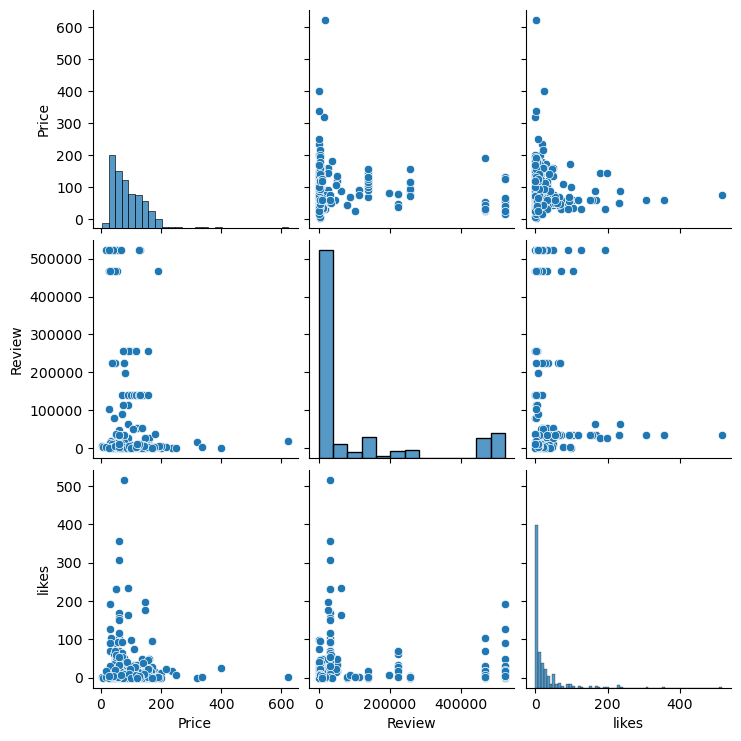

In [501]:
# create pairplot to check relationship between all numerical columns
sns.pairplot(df)
plt.show()

# Observation:
- There seems to be a positive correlation between Reviews and Likes, indicating that products with more reviews tend to have more likes.
- The distribution of Prices, Reviews, and Likes is skewed to the right, suggesting a few products with very high values.

- Price vs. Reviews: There's a weak positive correlation between Price and Reviews. While higher-priced products tend to have more reviews, it's not a strong relationship.
- Price vs. Likes: A similar weak positive correlation exists between Price and Likes.
- Reviews vs. Likes: A stronger positive correlation is observed between Reviews and Likes, suggesting that products with more reviews generally have more likes.

In [482]:
# top 10 highest price product in sneaker category in ebay
highest_price_product=df.sort_values(by="Price",ascending=False).head(10)
highest_price_product

,Title,Price,Review,likes,Product_Link,item_number
270,Valentino Garavani Ready Go Runner Wool Sock S...,622.99,17606,2.0,https://www.ebay.com/itm/126128930190?_skw=sne...,126128930190
132,FTP Osiris D3 2001 Size 12,400.00,85,25.0,https://www.ebay.com/itm/305825575030?_skw=sne...,305825575030
235,HOGAN men shoes Hogan-3R Recycle H590 sneaker ...,337.00,2098,1.0,https://www.ebay.com/itm/325759678705?_skw=sne...,325759678705
208,Isaia White Leather Sneakers Shoes IDS53A Man,317.90,15612,0.0,https://www.ebay.com/itm/286046980782?_skw=sne...,286046980782
183,Adidas Yeezy Boost 700 V3 Dark US Size 9 Perfe...,250.00,25,8.0,https://www.ebay.com/itm/356167788614?_skw=sne...,356167788614
123,Lanvin Paris Leather DDB0 Sneakers Size 44 New...,235.00,98,19.0,https://www.ebay.com/itm/226263810824?_skw=sne...,226263810824
220,IF9280 TMNT Teenage Mutant Ninja Turtles adida...,216.00,2679,22.0,https://www.ebay.com/itm/256454467058?_skw=sne...,256454467058
39,New Kiton Napoli Suede Leather Fashion Sneaker...,199.00,129,12.0,https://www.ebay.com/itm/266815197379?_skw=sne...,266815197379
99,New Kiton Napoli Suede Leather Fashion Sneaker...,199.00,129,12.0,https://www.ebay.com/itm/266815197379?_skw=sne...,266815197379
230,adidas Originals Country Japan IG4554 Preloved...,199.00,5004,0.0,https://www.ebay.com/itm/356179676888?_skw=sne...,356179676888


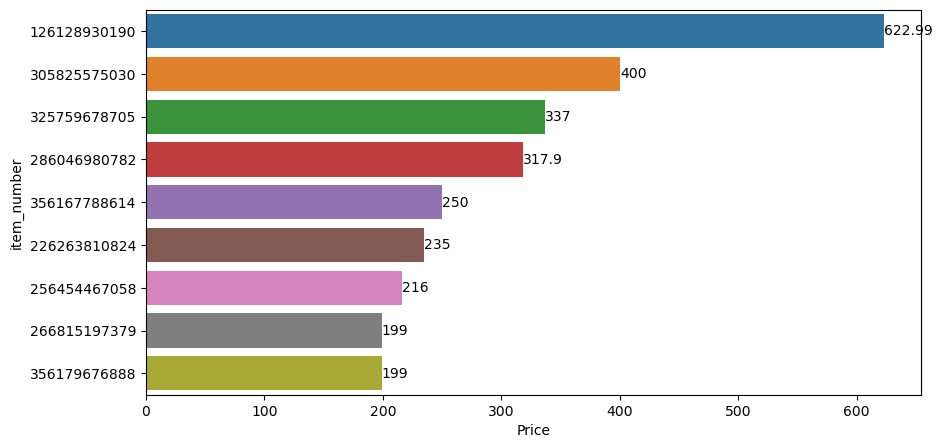

In [484]:
plt.figure(figsize=(10,5))
hpp=sns.barplot(data=highest_price_product,x="Price",y="item_number")
for i in hpp.containers:
    hpp.bar_label(i)
plt.show()

# Observation:
- Item Number 126128930190: This item has the highest price, at approximately 623 units.
- Item Number 305825575030: This item has a price around 400 units.
- Item Number 325759678705: This item has a price around 337 units.
- Item Number 286046980782: This item has a price around 318 units.

In [486]:
# top 10 highest review product in sneaker category in ebay
highest_review_product=df.sort_values(by="Review",ascending=False).head(10)
highest_review_product

,Title,Price,Review,likes,Product_Link,item_number
265,Puma Triple Mid Basketball Mens Red Sneakers ...,29.99,523829,91.0,https://www.ebay.com/itm/403834886517?_skw=sne...,403834886517
173,"Puma Bmw Mms RCat Machina Lace Up Mens Black,...",39.99,523829,2.0,https://www.ebay.com/itm/405214295966?_skw=sne...,405214295966
34,"Puma Bmw Mms RCat Machina Lace Up Mens Black,...",39.99,523829,2.0,https://www.ebay.com/itm/405214295966?_skw=sne...,405214295966
281,Avia AviFactor 2.0 Running Mens Beige Sneaker...,29.99,523829,31.0,https://www.ebay.com/itm/404800673635?_skw=sne...,404800673635
283,Puma Suede Triplex Lace Up Mens Red Sneakers ...,44.99,523829,21.0,https://www.ebay.com/itm/405045985217?_skw=sne...,405045985217
57,adidas Yeezy Foam Rnr Slip On Youth Boys Bro...,59.99,523829,1.0,https://www.ebay.com/itm/405330551367?_skw=sne...,405330551367
260,Puma Viz Runner Repeat Running Mens Black Sne...,49.99,523829,26.0,https://www.ebay.com/itm/404113073872?_skw=sne...,404113073872
50,Puma Ca Pro Embroidered Lace Up Mens White Sn...,29.99,523829,127.0,https://www.ebay.com/itm/404313698485?_skw=sne...,404313698485
284,Puma Electrify Nitro 2 Running Mens Black Sne...,54.99,523829,3.0,https://www.ebay.com/itm/405235704980?_skw=sne...,405235704980
206,Puma Mb.04 La France Basketball Mens Blue Sne...,124.99,523829,0.0,https://www.ebay.com/itm/405288391482?_skw=sne...,405288391482


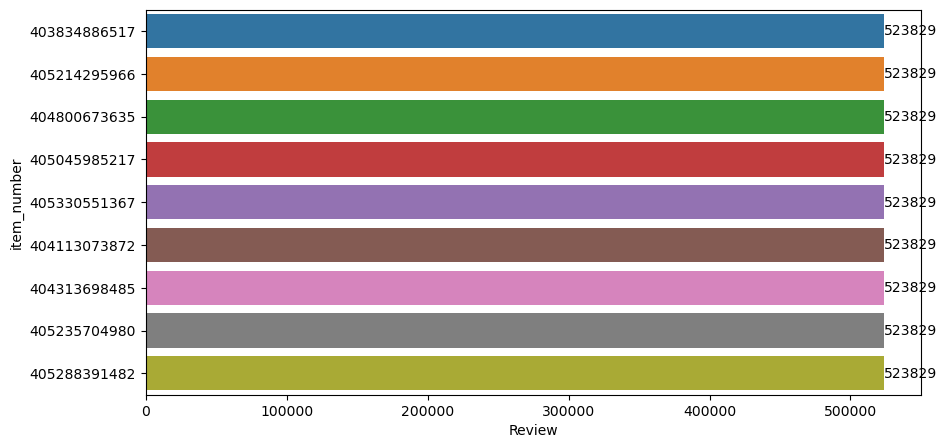

In [488]:
plt.figure(figsize=(10,5))
hrp=sns.barplot(data=highest_review_product,x="Review",y="item_number")
for i in hrp.containers:
    hrp.bar_label(i)
plt.show()

# Observation:
- All the items shown in the plot have the same number of reviews, which is approximately 523,829.
- Consistent Review Count: The uniformity in the review count for all displayed items suggests a potential data anomaly or a specific dataset selection criteria.
- Item Number Variation: The item numbers vary, indicating that multiple products have the same high number of reviews.

In [490]:
# top 10 highest like product in sneaker category in ebay
highest_like_product=df.sort_values(by="likes",ascending=False).head(10)
highest_like_product

,Title,Price,Review,likes,Product_Link,item_number
152,Adidas Adizero Ubersonic 4.1 CL Men's Tennis S...,74.95,33315,517.0,https://www.ebay.com/itm/304380142695?_skw=sne...,304380142695
6,Reebok Classic Nylon Men’s Running Shoe Black ...,59.95,33315,358.0,https://www.ebay.com/itm/304005443459?_skw=sne...,304005443459
68,Reebok Classic Nylon Men’s Running Shoe Black ...,59.95,33315,306.0,https://www.ebay.com/itm/304005443459?_skw=sne...,304005443459
37,Air Force 1 '07 White/ Black CT2302-100 Fashio...,88.35,63683,235.0,https://www.ebay.com/itm/116100458283?_skw=sne...,116100458283
124,Adidas Vs Pace 2.0 Men’s Skate Shoe White Athl...,49.95,33315,232.0,https://www.ebay.com/itm/304462226313?_skw=sne...,304462226313
24,Adidas Vs Pace 2.0 Men’s Skate Shoe White Athl...,49.95,33315,232.0,https://www.ebay.com/itm/304462226313?_skw=sne...,304462226313
116,Adidas Vs Pace 2.0 Men’s Skate Shoe White Athl...,49.95,33315,232.0,https://www.ebay.com/itm/304462226313?_skw=sne...,304462226313
215,New NIKE Air Max 90 Men's classic Athletic Sne...,144.99,26477,199.0,https://www.ebay.com/itm/234546572754?_skw=sne...,234546572754
126,Puma Twitch Runner Trail Running Mens Black S...,29.99,523829,193.0,https://www.ebay.com/itm/404103958721?_skw=sne...,404103958721
56,New NIKE Air Max 90 Men's classic Athletic Sne...,144.99,26477,178.0,https://www.ebay.com/itm/234546572754?_skw=sne...,234546572754


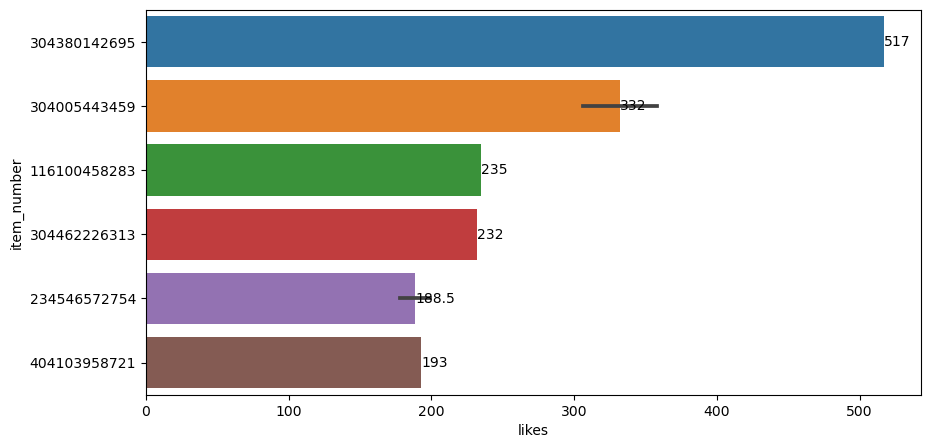

In [492]:
plt.figure(figsize=(10,5))
hlp=sns.barplot(data=highest_like_product,x="likes",y="item_number")
for i in hlp.containers:
    hlp.bar_label(i)
plt.show()

# Observation:
- Item Number 304380142695: This item has the highest number of likes, approximately 517.
- Item Number 304005443459: This item has a significant number of likes, around 422.
- Item Number 116100458283: This item has a moderate number of likes, around 235.

# Thank You